In [28]:
import pandas as pd
import numpy as np
from varname import nameof

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import html
import lxml

sns.set_theme()
pd.options.display.max_seq_items = 2000

In [2]:
df_path = "../data/Health/"

demographic = pd.read_csv(df_path + "demographic.csv")
diet = pd.read_csv(df_path + "diet.csv")
examination = pd.read_csv(df_path + "examination.csv")
labs = pd.read_csv(df_path + "labs.csv")
medications = pd.read_csv(df_path + "medications.csv")
questionnaire = pd.read_csv(df_path + "questionnaire.csv")

datasets = [demographic, diet, examination, labs, medications, questionnaire]

In [3]:
full_df = pd.merge(demographic, diet, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, examination, how = "outer", on = "SEQN")
full_df = pd.merge(full_df, labs, how = "outer", on = "SEQN")
#full_df = pd.merge(full_df, medications, how = "outer", on = "SEQN")           # This one doesn't match correctly on SEQN, so I'll leave it out as it is not interesting for me anyway
full_df = pd.merge(full_df, questionnaire, how = "outer", on = "SEQN")

full_df.shape

(10175, 1812)

In [4]:
final_columns_df = pd.read_csv("../data/Health/final_column_names.csv")
final_columns = final_columns_df["column"]
final_columns.values

array(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'WTDRD1', 'WTDR2D', 'DR1TNUMF',
       'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TATOC', 'DR1TVARA', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TCHL',
       'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS',
       'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TSODI', 'DR1TPOTA',
       'PEASCST1', 'BPXPTY', 'BMXWT', 'BMXBMI', 'CSQ190', 'CSQ200',
       'CSQ202', 'CSQ204', 'DID040', 'DIQ160', 'MCQ080', 'MCQ082',
       'OSQ060', 'PAQ610', 'PAD615', 'WHD110', 'WHD120'], dtype=object)

In [5]:
# After joining all the datasets and checking what columns I need/want, this is the result
final_df = full_df[final_columns.values]
final_df.head()

,SEQN,RIAGENDR,RIDAGEYR,WTDRD1,WTDR2D,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,...,CSQ204,DID040,DIQ160,MCQ080,MCQ082,OSQ060,PAQ610,PAD615,WHD110,WHD120
0,73557,1,69,16888.327864,12930.890649,11.0,1574.0,43.63,239.59,176.47,...,2.0,62.0,NaN,1.0,2.0,2.0,NaN,NaN,270.0,200.0
1,73558,1,54,17932.143865,12684.148869,8.0,5062.0,338.13,423.78,44.99,...,2.0,23.0,NaN,2.0,2.0,2.0,NaN,NaN,240.0,250.0
2,73559,1,72,59641.812930,39394.236709,27.0,1743.0,64.61,224.39,102.90,...,2.0,57.0,NaN,2.0,2.0,1.0,NaN,NaN,180.0,190.0
3,73560,1,9,142203.069917,125966.366442,19.0,1490.0,77.75,162.92,80.58,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,73561,2,73,59052.357033,39004.892993,7.0,1421.0,55.24,178.20,87.78,...,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,150.0,135.0


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 0 to 10174
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   RIAGENDR  10175 non-null  int64  
 2   RIDAGEYR  10175 non-null  int64  
 3   WTDRD1    9813 non-null   float64
 4   WTDR2D    8661 non-null   float64
 5   DR1TNUMF  8661 non-null   float64
 6   DR1TKCAL  8531 non-null   float64
 7   DR1TPROT  8531 non-null   float64
 8   DR1TCARB  8531 non-null   float64
 9   DR1TSUGR  8531 non-null   float64
 10  DR1TFIBE  8531 non-null   float64
 11  DR1TTFAT  8531 non-null   float64
 12  DR1TSFAT  8531 non-null   float64
 13  DR1TMFAT  8531 non-null   float64
 14  DR1TPFAT  8531 non-null   float64
 15  DR1TCHOL  8531 non-null   float64
 16  DR1TATOC  8531 non-null   float64
 17  DR1TVARA  8531 non-null   float64
 18  DR1TVB6   8531 non-null   float64
 19  DR1TFOLA  8531 non-null   float64
 20  DR1TFA    8531 non-null   fl

In [7]:
descriptions = pd.read_csv("../data/Health/final_column_names.csv")
descriptions.head()

,column,description
0,SEQN,Respondent sequence number.
1,RIAGENDR,Gender of the participant.
2,RIDAGEYR,Age in years of the participant at the time of...
3,WTDRD1,Dietary day one sample weight
4,WTDR2D,Dietary two-day sample weight


In [8]:
descriptions[descriptions["column"] == "SEQN"]["description"][0]

'Respondent sequence number.'

In [9]:
columns_to_drop = []

for column in final_df.columns:

    missing_values = final_df[column].isna().sum()
    description = descriptions[descriptions["column"] == column]["description"].values[0]

    if missing_values > 7000:
        #print(f"{column} : {description} has {missing_values} missing values")
        #print("-" * 80)
        columns_to_drop.append(column)

In [10]:
final_df["DID040"].isna().sum()

9438

In [11]:
final_df_2 = final_df.drop(columns_to_drop, axis = 1)
final_df_2 = final_df_2.set_index("SEQN")
final_df_2.head()

,RIAGENDR,RIDAGEYR,WTDRD1,WTDR2D,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,...,BMXBMI,CSQ200,CSQ202,CSQ204,DIQ160,MCQ080,MCQ082,OSQ060,WHD110,WHD120
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,1,69,16888.327864,12930.890649,11.0,1574.0,43.63,239.59,176.47,10.8,...,26.7,2.0,1.0,2.0,NaN,1.0,2.0,2.0,270.0,200.0
73558,1,54,17932.143865,12684.148869,8.0,5062.0,338.13,423.78,44.99,16.7,...,28.6,2.0,2.0,2.0,NaN,2.0,2.0,2.0,240.0,250.0
73559,1,72,59641.812930,39394.236709,27.0,1743.0,64.61,224.39,102.90,9.9,...,28.9,2.0,2.0,2.0,NaN,2.0,2.0,1.0,180.0,190.0
73560,1,9,142203.069917,125966.366442,19.0,1490.0,77.75,162.92,80.58,10.6,...,17.1,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
73561,2,73,59052.357033,39004.892993,7.0,1421.0,55.24,178.20,87.78,12.3,...,19.7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,150.0,135.0


In [12]:
def box_plot(df, column):
    fig, ax = plt.subplots(figsize = (6, 6))

    sns.boxplot(x = df[column])

    plt.xlabel(f'{descriptions[descriptions["column"] == column]["description"].values[0]} ({column})')

In [13]:
#for i in final_df_2.columns:
#    box_plot(final_df_2, i)

In [14]:
for i in final_df_2.columns:
    print(f'{descriptions[descriptions["column"] == i]["description"].values[0]} ({i})')
    # I sort by index because I have a ton of categorical variables, I want to see it by levels
    print(final_df_2[i].value_counts().sort_index(ascending = False))
    print('-' * 50)

Gender of the participant. (RIAGENDR)
2    5172
1    5003
Name: RIAGENDR, dtype: int64
--------------------------------------------------
Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age. (RIDAGEYR)
80    352
79     30
78     36
77     38
76     51
     ... 
4     230
3     220
2     278
1     262
0     405
Name: RIDAGEYR, Length: 81, dtype: int64
--------------------------------------------------
Dietary day one sample weight (WTDRD1)
267526.890966       1
264762.864165       1
257670.870632       1
250735.384335       1
246795.508377       1
                 ... 
2654.265203         1
2642.850637         2
2493.179982         2
2493.021655         1
0.000000         1152
Name: WTDRD1, Length: 7931, dtype: int64
--------------------------------------------------
Dietary two-day sample weight (WTDR2D)
818626.657231       1
617126.819371       1
543075.098769       1
522292.846567       1
499194.911685       1
            

In [15]:
# I'll drop observations aged < 20, as kids and teenegar usually have different dietary needs compared to adults // and the recommended daily intake I have is also starting from 20
#df3 = final_df_2[final_df_2["RIDAGEYR"] >= 20]
df3 = final_df_2
#print(final_df_2.shape)
#print(df3.shape)

In [16]:
for i in df3.columns:
    print(f'{descriptions[descriptions["column"] == i]["description"].values[0]} ({i})')
    # I sort by index because I have a ton of categorical variables, I want to see it by levels
    print(df3[i].value_counts().sort_index(ascending = False))
    print('-' * 50)

Gender of the participant. (RIAGENDR)
2    5172
1    5003
Name: RIAGENDR, dtype: int64
--------------------------------------------------
Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age. (RIDAGEYR)
80    352
79     30
78     36
77     38
76     51
     ... 
4     230
3     220
2     278
1     262
0     405
Name: RIDAGEYR, Length: 81, dtype: int64
--------------------------------------------------
Dietary day one sample weight (WTDRD1)
267526.890966       1
264762.864165       1
257670.870632       1
250735.384335       1
246795.508377       1
                 ... 
2654.265203         1
2642.850637         2
2493.179982         2
2493.021655         1
0.000000         1152
Name: WTDRD1, Length: 7931, dtype: int64
--------------------------------------------------
Dietary two-day sample weight (WTDR2D)
818626.657231       1
617126.819371       1
543075.098769       1
522292.846567       1
499194.911685       1
            

In [17]:
df4 = df3[df3["CSQ200"] != 9]
df4 = df4[df4["CSQ202"] != 9]
df4 = df4[df4["CSQ204"] != 9]
df4 = df4[df4["DIQ160"] != 9]
df4 = df4[df4["MCQ080"] != 9]
df4 = df4[df4["MCQ082"] != 9]
df4 = df4[df4["OSQ060"] != 9]
print(df3.shape)
print(df4.shape)

(10175, 45)
(10140, 45)


In [18]:
# To see the relation between total fatty monosaturad acid and diabetes

# DR1TSFAT
diabetic = df4[df4["DIQ160"] == 1]
not_diabetic = df4[df4["DIQ160"] == 2]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total sugars (gm) (DR1TSUGR)')

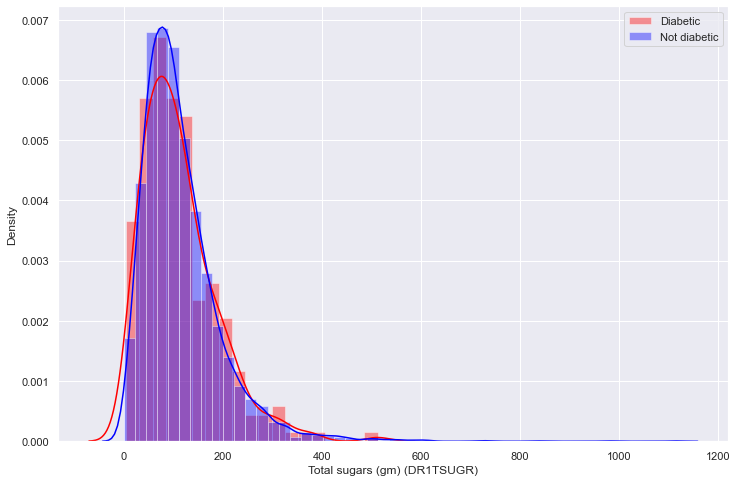

In [19]:
sns.set_theme()

plt.figure(figsize = (12, 8))

column = "DR1TSUGR"

sns.distplot(diabetic[column], color = "red", label = "Diabetic")
sns.distplot(not_diabetic[column], color = "blue", label = "Not diabetic")

plt.legend()
plt.xlabel(f'{descriptions[descriptions["column"] == column]["description"].values[0]} ({column})')

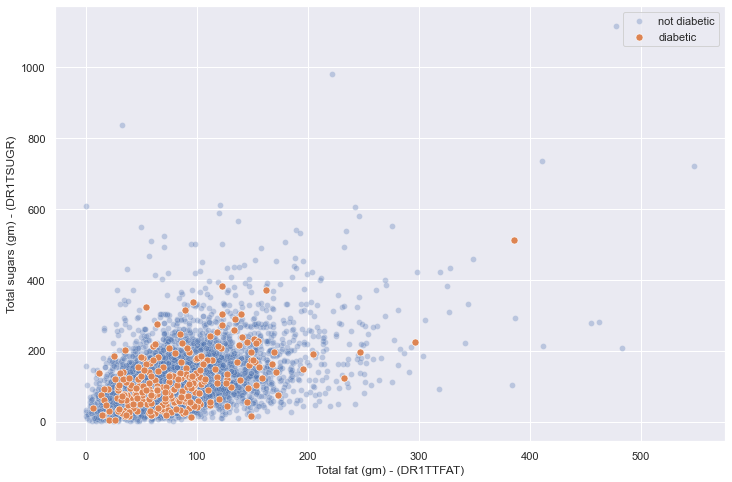

In [20]:
plt.figure(figsize = (12, 8))

y_axis = "DR1TSUGR"
x_axis = "DR1TTFAT"
hue = "DIQ160"

y_axis_desc = descriptions[descriptions["column"] == y_axis]["description"].values[0]
x_axis_desc = descriptions[descriptions["column"] == x_axis]["description"].values[0]
hue_desc = descriptions[descriptions["column"] == hue]["description"].values[0]

sns.scatterplot(data = not_diabetic, x = x_axis, y = y_axis, alpha = 0.3)
sns.scatterplot(data = diabetic, x = x_axis, y = y_axis, s = 50)
#sns.scatterplot(data = df4, x = x_axis, y = y_axis, hue = hue, size = hue, sizes = (200, 20), alpha = 0.8,palette = "deep")


plt.ylabel(f"{y_axis_desc} - ({y_axis})")
plt.xlabel(f"{x_axis_desc} - ({x_axis})")

plt.legend(["not diabetic", "diabetic"])
plt.show()

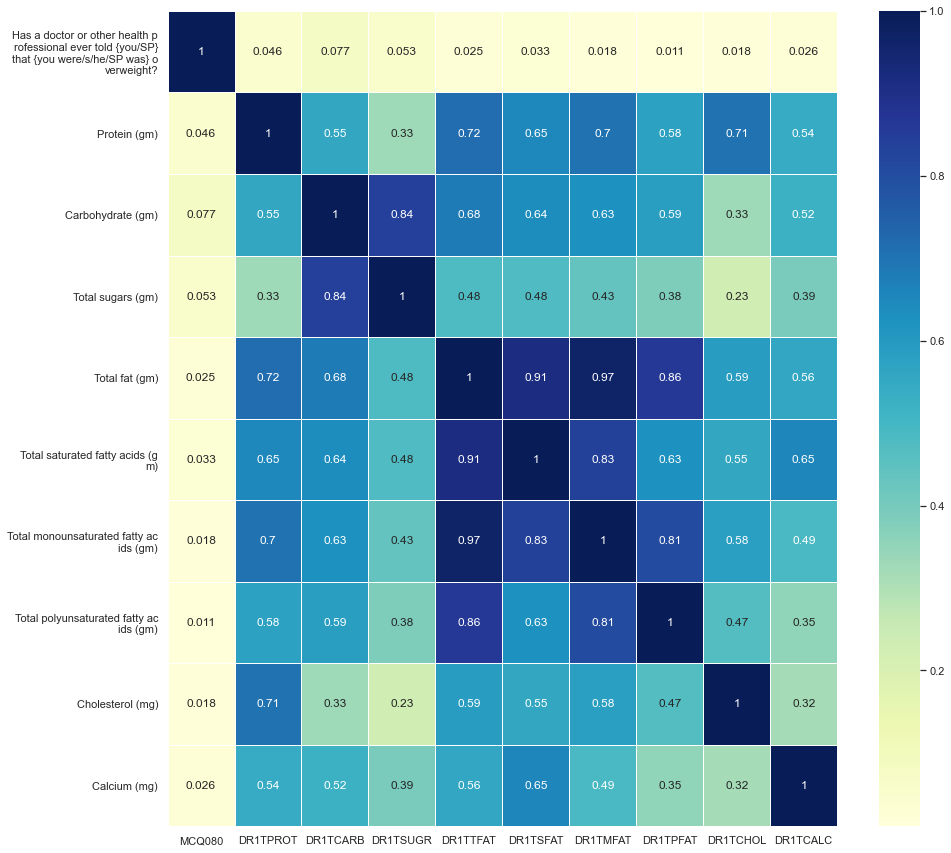

In [27]:
plt.figure(figsize = (15, 15))

health_condition = ["MCQ080"]
nutrients = ["DR1TPROT", "DR1TCARB", "DR1TSUGR", "DR1TTFAT", "DR1TSFAT", "DR1TMFAT", "DR1TPFAT", "DR1TCHOL", "DR1TCALC"]
filter_ = health_condition + nutrients

y_labels = []

for column in filter_:
    a = descriptions[descriptions["column"] == column]["description"].values[0]
    if len(a) < 30:
        y_labels.append(a)
    else:
        n = 30
        chunks = [a[i:i+n] for i in range(0, len(a), n)]
        new_a = '\n'.join(chunks)
        y_labels.append(new_a)

#y_labels = [descriptions[descriptions["column"] == column]["description"].values[0] for column in filter_]

corr = df4[filter_].corr()
sns.heatmap(corr, annot = True, linewidths = .5, cmap = "YlGnBu", yticklabels = y_labels)

plt.show()